В качестве домашнего задания вам предлагается поработать над предсказанием погоды. Файл с данными вы найдете в соответствующей директории. Вам будет доступен датасет weather.csv, ПЕРВЫЕ 75% (shuffle = False) которого нужно взять для обучения, последние 25% - для тестирования.

Требуется построить 4 модели которые будут предсказывать целевую переменную <b>RainTomorrow</b> с помощью:

   1. логистической регрессии [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
   
   2. метода ближайших соседей [sklearn.neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
 
   3. Байесовского классификатора [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
   
   4. логистической регрессии реализованной самостоятельно

Затем следует сравнить результаты моделей (по качеству и времени выполнения) и сделать вывод о том, какая модель и с какими параметрами даёт лучшие результаты.

Не забывайте о том, что работа с признаками играет очень большую роль в построении хорошей модели.

Краткое описание данных:

    Date - Дата наблюдений
    Location - Название локации, в которой расположена метеорологическая станция
    MinTemp - Минимальная температура в градусах цельсия
    MaxTemp - Максимальная температура в градусах цельсия
    Rainfall - Количество осадков, зафиксированных за день в мм
    Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
    Sunshine - Число солнечных часов за день
    WindGustDir - направление самого сильного порыва ветра за последние 24 часа
    WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
    WindDir9am - направление ветра в 9 утра

In [16]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib notebook

### Анализ данных

In [17]:
data = pd.read_csv('weather.csv')
data

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
142189,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
142190,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
142191,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [18]:
data.RainTomorrow.replace({'No':0, 'Yes':1}, inplace=True)
data

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
142189,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
142190,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
142191,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0


#### Уберем столбец 'Unnamed: 0', т.к. он не несет полезной информации для нашей модели и разобьем выборку на тренировочную и тестовую

In [19]:
X = data.drop(columns=['Unnamed: 0'])

In [20]:
from sklearn.model_selection import train_test_split
y = X['RainTomorrow']
X = X.drop(columns=['RainTomorrow'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = False)

#### Выделим количественные признаки и найдем их корреляцию с таргетом

In [21]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(10, 7)

#### Проанализируем распределения наших признаков

<IPython.core.display.Javascript object>


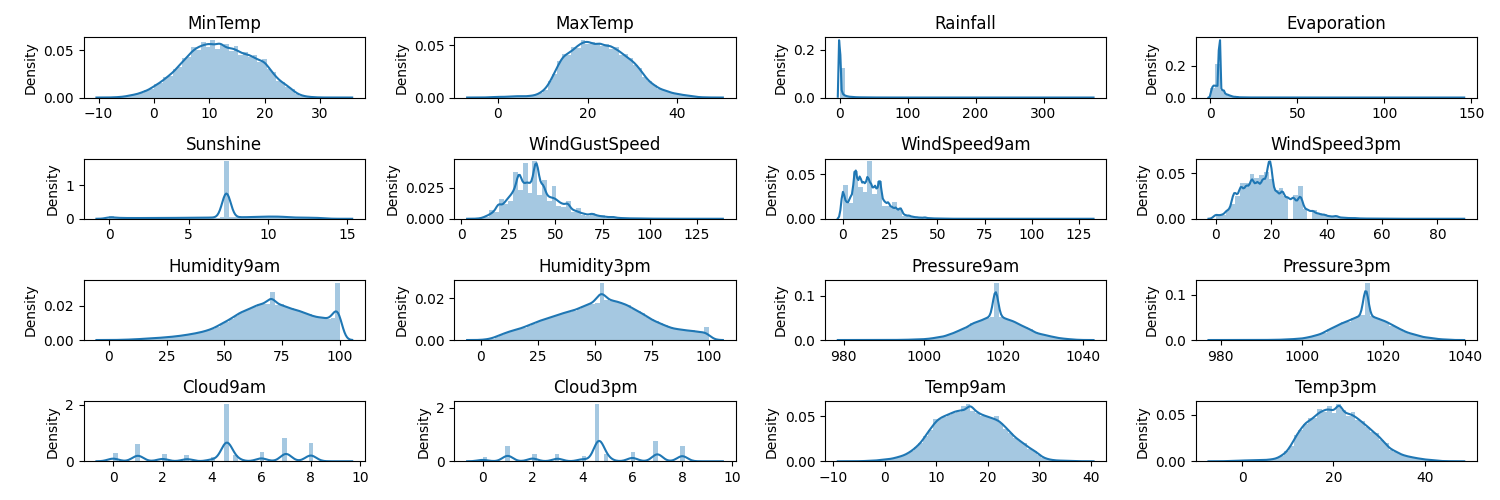

In [22]:
fig, axes = plt.subplots(4, 4, figsize=(15, 5))
for i in range(4):
    for j in range(4):
        sns.distplot(ax=axes[i][j], x = X_train[numeric_features[i * 4 + j]])
        axes[i][j].set_title(numeric_features[i * 4 + j])

fig.tight_layout()
plt.show()

### Встроенная логистическая регрессия

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train[numeric_features], y_train)

LogisticRegression()

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))
accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy}')

Test MAE = 0.2524
Train MAE = 0.2685
Accuracy: 0.8456496666572899


In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="neg_mean_absolute_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MAE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -0.2333
	-0.3055
	-0.2723
	-0.2760
	-0.2890
	-0.2708
	-0.2536
	-0.2828
	-0.2949
	-0.2354
Mean CV MAE = 0.2714


In [27]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

<IPython.core.display.Javascript object>


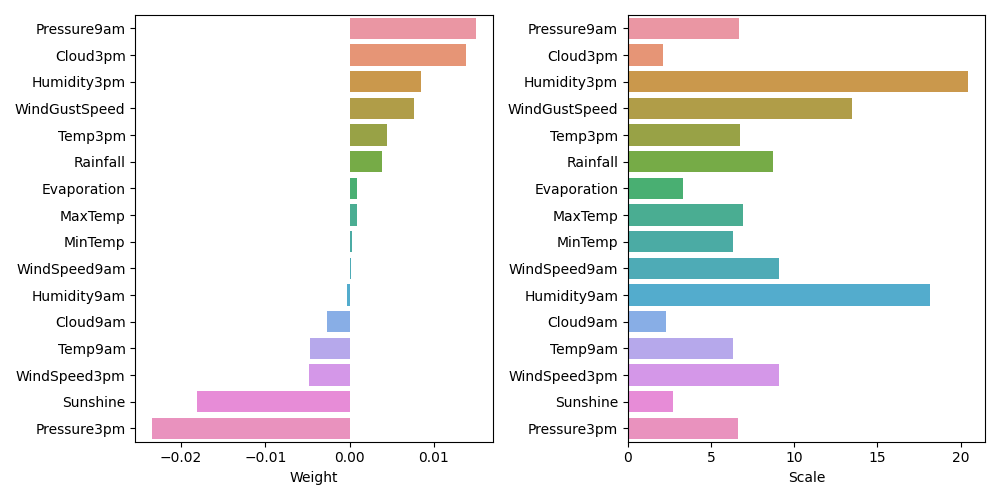

In [28]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

#### Попробуем нормализовать наши признаки

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))
accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy}')
model.coef_

Test MAE = 0.2524
Train MAE = 0.2685
Accuracy: 0.8456496666572899


array([ 0.00195403,  0.0060835 ,  0.03380548,  0.00291871, -0.04966889,
        0.1023757 ,  0.00130601, -0.04390902, -0.00504155,  0.17332534,
        0.10087089, -0.15541542, -0.0062289 ,  0.02911661, -0.02934517,
        0.0302833 ])

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy}')

Accuracy: 0.8456496666572899


<IPython.core.display.Javascript object>


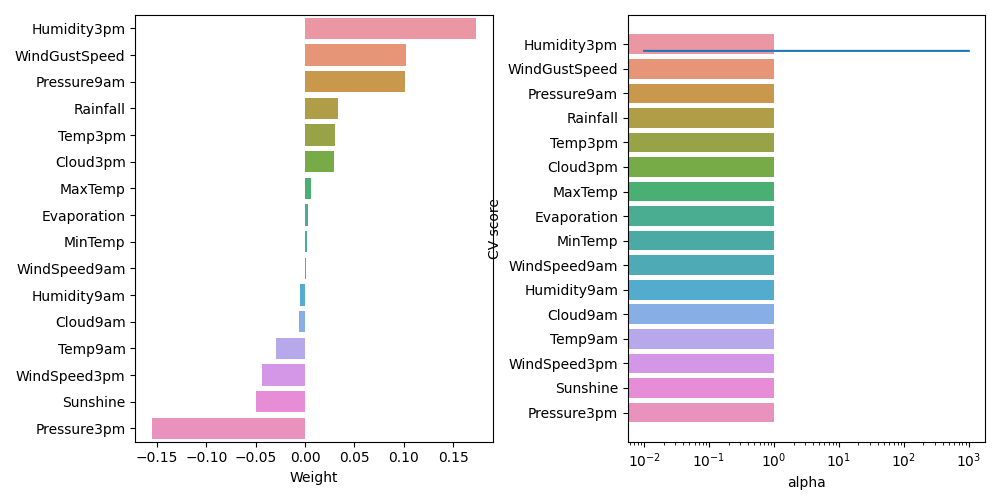

In [31]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

#### Подберем коэффициент регуляризации

In [32]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_mean_absolute_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

Best alpha = 0.0100


Text(501.94444444444446, 0.5, 'CV score')

In [33]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy}')

Test MAE = 0.2524
Accuracy: 0.8456496666572899


#### Включим в рассмотрение категориальные признаки

In [34]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy}')

Test MAE = 0.2674
Accuracy: 0.8396579369321219


### Метод ближайших соседей

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [37]:
for n in [2, 4, 8, 16, 50, 100, 200]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train[numeric_features], y_train)
    y_pred = knn.predict(X_test[numeric_features])
    y_train_pred = knn.predict(X_train[numeric_features])
    print(f'neighbours = {n}')
    print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
    print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print()

neighbours = 2
Test MAE = 0.1796
Train MAE = 0.1097
Accuracy: 0.8204450195504797

neighbours = 4
Test MAE = 0.1696
Train MAE = 0.1276
Accuracy: 0.8304031055725899

neighbours = 8
Test MAE = 0.1601
Train MAE = 0.1400
Accuracy: 0.8398548482376438

neighbours = 16
Test MAE = 0.1565
Train MAE = 0.1469
Accuracy: 0.8435117724830515

neighbours = 50
Test MAE = 0.1525
Train MAE = 0.1532
Accuracy: 0.8475343891530001

neighbours = 100
Test MAE = 0.1516
Train MAE = 0.1550
Accuracy: 0.8484064249345973

neighbours = 200
Test MAE = 0.1540
Train MAE = 0.1569
Accuracy: 0.8460153590818307



### Байесовский классификатор

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train[numeric_features], y_train)
y_pred = gnb.predict(X_test[numeric_features])
y_train_pred = gnb.predict(X_train[numeric_features])
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print()

Test MAE = 0.1635
Train MAE = 0.1919
Accuracy: 0.8364510956707643



### Реализация логистической регрессии
__Логистическая регрессия__

$$p(y|x) = a(x, \theta) = \sigma(\langle x, \theta \rangle) = \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}$$

In [39]:
theta = np.array([1, 2, 3])

X =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y = np.array([1, 1, 0, 0])

In [40]:
def probability(theta, X):
    result = 1 / (1 + np.exp(-np.dot(theta, np.transpose(X))))
    return result

prob = probability(theta, X)


assert type(prob) == np.ndarray, 'Возвращается неверный тип'
assert prob.shape == (X.shape[0],), 'Неверный размер массива'
assert (prob.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Функция считается неверно'

Функция предсказания метки класса, получает на вход вероятности принадлежности к классу 1 и выдает метки классов $y \in \{0, 1\}$

In [41]:
def binary_class_prediction(theta, X, threshold =.5):
    prob =  probability(theta, X)
    r_vec = np.vectorize(round)
    result = r_vec(prob)
    return result

y_pred = binary_class_prediction(theta, X)


assert type(y_pred) == np.ndarray, 'Возвращается неверный тип'
assert y_pred.shape == (X.shape[0],), 'Неверный размер массива'
assert min(y_pred) == 0, 'Функция считается неверно'
assert max(y_pred) == 1, 'Функция считается неверно'

__Функционал качества логистической регрессии__

Запишем правдободовие выборки для меток класса $y \in \{+1, -1\}$ 

$$Likelihood(a, X^\ell) = \prod_{i = 1}^{\ell} a(x_i,\theta)^{[y_i = +1]} (1 - a(x_i, \theta))^{[y_i = -1]} → \operatorname*{max}_{\theta}$$ 

Прологарифмируем правдоподобие выборки и перейдем к задаче минимизации:

$$Q(a, X^\ell) =     -\sum_{i = 1}^{\ell} 
        [y_i = +1] \log a(x_i, \theta)
        +
        [y_i = -1] \log (1 - a(x_i, \theta)) \to \operatorname*{min}_{\theta}$$ 
        
Подставим $a(x, \theta)$ в функционал качества:

$$ Q(a, X^\ell) = -\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{\exp(-\langle \theta, x_i \rangle)}{1 + \exp(-\langle \theta, x_i \rangle)}
\right)
=\\
=
-\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{1}{1 + \exp(\langle \theta, x_i \rangle)}
\right)
=\\
=
\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) $$
    

Итоговый оптимизируемый функционал качества (logloss), записанный для меток классов $y \in \{+1, -1\}$ и усредненный по выборке

$$Q(a, X^\ell) = \frac{1}{\ell}\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) \to \operatorname*{min}_{\theta}$$

Реализуем его в функции logloss:

In [42]:
def logloss(theta, X, y): 
    l = X.shape[0]
    a = probability(theta, X)
    exponenta = -y * np.log(a) - (1 - y) * np.log(1 - a)
    result = 1 / l * sum(exponenta)
    print(result)
    return result

In [43]:
assert logloss(theta, X, y).round(3) == 0.861, 'Функция считается неверно'

0.8606664224002999


__Алгоритм оптимизации функционала качества. Стохастический градиентный спуск__

<b>Вход: </b> Выборка $X^\ell$, темп обучения $h$

<b>Выход: </b> оптимальный вектор весов $\theta$

1.  Инициализировать веса $\theta$
2.  Инициализировать оценку функционала качества: $Q(a, X^\ell)$
3.  <b>Повторять</b>: 

    Выбрать случайным образом подвыборку объектов $X^{batch} =\{x_1, \dots,x_n \}$ из $X^{\ell}$
    
    Рассчитать градиент функционала качества: $\nabla Q(X^{batch}, \theta)$
    
    Обновить веса: $\theta := \theta - h\cdot \nabla Q(X^{batch}, \theta)$
       
    <b>Пока</b> значение $Q$ и/или веса $\theta$ не сойдутся   

Реализуем функцию рассчета градиента функционала качества

$$\frac{\partial Q(a, X^{batch}) }{\partial \theta_j}   = \frac{\partial \frac{1}{n}\sum_{i = 1}^{n}
    \log \left(
        1 + \exp(- y_i \langle \theta, x_i \rangle)
    \right)} {\partial \theta_j}  = \frac{1}{n}\sum_{i = 1}^{n}
     \frac {1}{
        1 + \exp(- y_i \langle \theta, x_i \rangle)} \cdot  \exp(- y_i \langle \theta, x_i \rangle) \cdot -y_i x_{ij}$$

Реализуйте рассчет градиента в матричном виде:

In [44]:
def gradient_for_one_var(theta, X, y, j):
    n = X.shape[0]
    s = 0
    result = 1 / n * np.sum(1 / (1 + np.exp(-y * np.dot(theta, np.transpose(X)))) * np.exp(-y * np.dot(theta, np.transpose(X))) * (-y * np.transpose(X)[j]))
    print(result)
    return result

def gradient(theta, X, y):
    dimension = theta.shape[0]
    result = []
    for i in range(dimension):
        result.append(gradient_for_one_var(theta, X, y, i))
    
    return np.array(result)

assert gradient(theta, X, y).shape == theta.shape, 'Неверный размер массива'

0.21958111370531191
0.4397803831997825
-0.2208174252836293


Функция обучения уже реализована

In [45]:
def fit(X, y, batch_size=10, h=0.05,  iters=100, plot=True):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    theta = np.random.uniform(size=dim)
    
    errors = []
    
    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
    
    # plt 
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
        
    for _ in range(iters):  
        
        # берём случайный набор элементов
        batch = np.random.choice(size, batch_size, replace=False)
        X_batch = X[batch]
        y_batch = y[batch]

        # считаем производные
        grad = gradient(theta, X_batch, y_batch)
        
        assert type(grad) == np.ndarray, 'неверный тип'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(theta), 'длина вектора должна быть равной количеству весов'
        
        
        # Обновляем веса
        
        theta -= grad * h
        
        theta_history = np.vstack((theta_history, theta))
        
        # error
        loss = logloss(theta, X, y)
        errors.append(loss)
        
        if plot:
            ax1.clear()            
            ax1.scatter(range(dim), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('theta')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax2.set_xlabel('itarations')
            
            ax3.plot(theta_history)
            ax3.set_title('update theta')
            ax3.set_ylabel('value')
            ax3.set_xlabel('itarations')
            time.sleep(0.05)
            fig.canvas.draw()   
            
    return theta

In [46]:
X, y = make_classification(n_samples=2000)

<IPython.core.display.Javascript object>


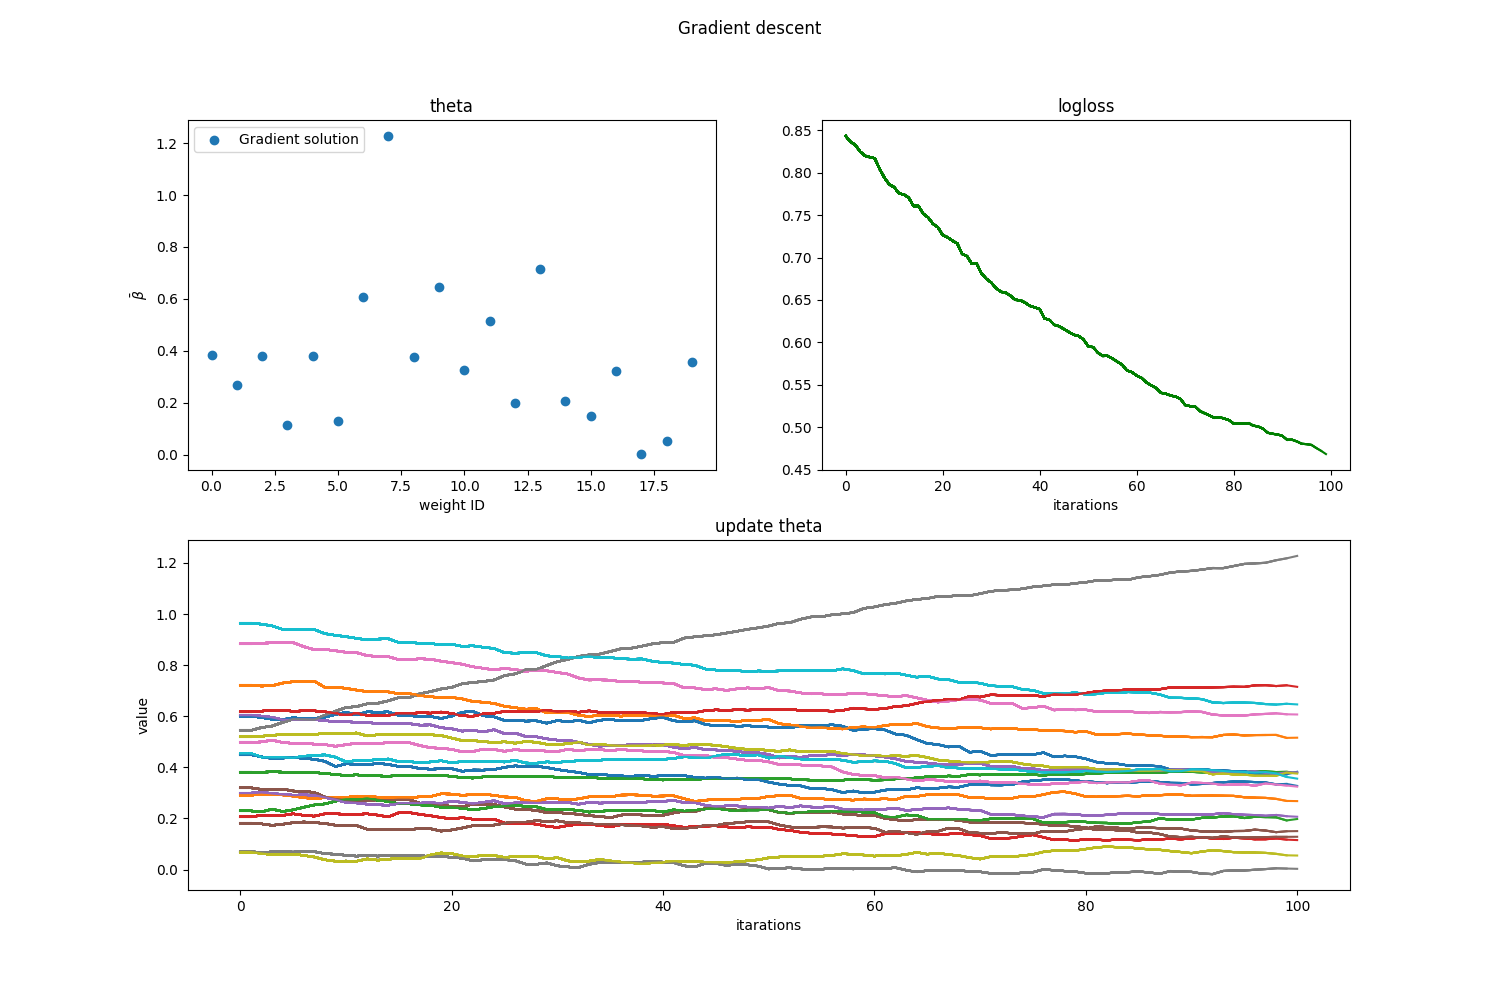

0.16496151155772473
-0.013083241455114584
-0.03842571834513771
0.13540139052688988
-0.0905614207902017
0.1087144523587495
-0.11991320095395455
-0.08287683429711394
0.08988866490665891
0.0026291519336131665
0.11916306434007562
0.0403134460186603
0.027591627380725983
-0.09004715400732205
-0.07539215716265031
-0.15251196236885028
0.03366801210640108
0.07238404406785913
0.038585131666808686
-0.06095705187531825
0.8434668256665617
0.10837228076606387
-0.03143278511683732
-0.009619077077192681
-0.12702929518792885
0.07069866707574006
0.12658165921284473
-0.042961295745397254
-0.22535444189990975
-0.03173947622241805
0.08304456223952567
0.1772771877002724
0.06398876616336831
0.07859979944200061
-0.052866242688747844
-0.06711928227321572
0.04330670941238912
-0.03945583355720093
0.07895592137113258
0.11264366007861196
0.2743446536648914
0.836504560452013
0.13812521727749846
0.015954591741831618
-0.027623468672300384
0.005828469840832063
0.09632578878200607
-0.009762263643084128
-0.0273582520105

-0.3038511896707524
0.09826809485651648
0.11074082942754707
-0.09417020592700097
0.18052383618272064
0.027905276545564496
0.12030112017988737
-0.28446250787148136
0.2002004653281814
0.16631014259974874
0.20344630636785432
0.11496411690155893
0.09091615878921493
0.18195169624658836
0.09713928788809578
-0.15439021287993895
0.19018187330368483
0.08077288811053332
0.19375618846939768
-0.09993603148195185
0.7266490752763941
-0.0644549522106031
-0.058668406636641836
0.02695610491998987
0.11956573134943993
-0.06049673506423678
-0.21932131352504142
0.2017782318879865
-0.09824313559377598
-9.422467403832972e-05
-0.04482223354830994
-0.09838709757207498
0.20093777028344198
0.10683658081755187
0.03999185238464648
0.10994820650110855
-0.17970603030825982
-0.019884774090813285
0.2055360166069219
0.02697860035509153
-0.0033037745721156034
0.7239293172681539
0.3422973846519599
-0.018820834360938312
-0.08826234726518019
0.04824035712654413
0.1270508939669881
0.028588662358785974
0.11885525954645174
-0

0.26871673704345556
-0.01222351042748986
-0.07295860032312856
0.12286826518459196
0.19138700458244373
-0.19396892457776777
0.04326294445335127
-0.021635710882548884
-0.016130526568522364
0.0452952052366081
-0.01981101957650035
0.0016703797935327725
-0.1755421021607937
-0.15085655052806834
-0.07629373248273259
0.15284063879200205
0.09622126610244323
0.037826376569986296
-0.07419003543347553
-0.06681902835206714
0.6391686101676846
0.07608633530874638
0.21924172058686797
0.009317316664073538
0.1198995601518082
0.1316804007237565
-0.12705424142202748
0.34152458369970495
-0.3340020670120452
0.038175866025197604
0.11116924175165527
0.01042726331823523
0.2524269420270601
0.10220050615658104
-0.030646320119171334
0.17803527909516642
-0.023316535843153484
0.24130626160551127
0.2576346100951638
0.0034298666314598104
-0.13177385146670614
0.6281733546421607
-0.0706985493355992
0.2163642438682345
0.02877112962488192
-0.05709117447567588
-0.1215525222279432
0.030153263098825895
0.0043763064582529685

-0.038350836127227034
0.0213349407689228
0.020901614668527958
0.00777832114367296
0.08136995387973603
-0.03125870301152116
0.07848551502238515
-0.11164375884941252
0.020218491299261763
-0.050972214121923036
-0.06106350955649425
0.052955553365216956
0.03844989786270506
0.025752982469851995
-0.05389676018959299
0.04442833178899247
0.015123268282613948
0.006074160050090482
0.084067382300403
-0.047200614406482336
0.5649136353101636
0.09850191524685092
-0.03526897739613293
-0.01090650918660697
-0.22184053351327537
0.0910543567450412
0.22838820144524496
0.08246796188251777
-0.1811645148181696
0.04498549593542079
0.05725404177680358
-0.16502327495096375
-0.16773359619866976
0.3349713025566218
-0.048922321641988065
-0.014307218683996523
0.31442497539542386
0.16666063365230227
-0.0012621388537555401
-0.08209938824337029
0.018989505434165443
0.5608322673900361
0.3169603450916395
0.05991507276837571
-0.07869880868206885
-0.010691979962366614
0.14110085593042185
0.1138229046791111
0.07141531833704

0.17280385474146343
0.22746773096272366
-0.04107567514970173
-0.11931116636883916
-0.05000983761923087
0.09184887759106018
-0.016977315652399027
-0.07781271859196436
0.014463079473694497
0.14583845325444408
0.08878888198587752
-0.062436475152983055
0.017732185093383958
-0.09465945353672799
0.12401468927010556
-0.09407907696402062
-0.04428113662757667
0.12305915898664377
-0.11897413924254169
-0.052401141097353755
0.5084193603345394
0.24874066675311415
0.028109084321214006
-0.056411900230137306
0.044826759899051695
0.03863613078042006
0.18211803192289386
0.14542916089761623
-0.14169341778903538
0.13068455468780368
-0.033287001134487626
0.03517815764517555
0.2501358772938825
0.07701162123336547
-0.1351638504575888
-0.02802924827138535
-0.16151636460632596
0.09766178121687566
0.04271989479594723
-0.1266652590660314
0.06785269915881696
0.5041808882186899
0.10048916540483872
-0.047480763447772856
-0.026866057138321187
0.054415688019094556
-0.01945674579684411
-0.039839083303104865
0.01936113

0.11580050881138895
0.16013940518935776
-0.018523193750220168
0.0919575526718141
-0.10752130075623965
-0.0015852513054244574
0.0754003505823918
-0.15061791667460206
-0.2481888720688605
-0.06389035281616214
-0.0290655979395898
0.2300072101504466
0.24503440543888522
-0.05980929165363183
0.09519242439585529
-0.07232286414575617
0.08331092927463306
0.02086020918669322
0.11422054285966161
0.27826799666201324
0.47212487734870257
-0.20012078871407063
0.014884374603498413
0.07315796282914415
0.03686279675225409
-0.006983498878319394
-0.0064937224979951195
0.015769775411014566
-0.1897843318702667
0.07349860136291823
0.05063582484298504
0.15300134443338506
-0.014071618951808272
-0.11327643628686322
0.11992557915475927
0.04243618627973683
-0.011408209645475481
0.0892230862512709
0.021010832005494674
0.01652872508915057
0.13401081536569825
0.4683099300012949


In [47]:
optimal_theta = fit(X, y)

In [48]:
y_pred = binary_class_prediction(optimal_theta, X)

In [49]:
print("Test MAE = %.4f" % mean_absolute_error(y, y_pred))
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')
print()

Test MAE = 0.2210
Accuracy: 0.779



### Выводы: все четыре модели при разных подходах дают приблизительно один и тот же результат. Это доказывает состоятельность применяемых методов.
### При отборе признаков стоит внимательно изучить их корреляцию с искомой величиной. Исходя из этой логики были отброшены категориальные признаки, поскольку они не улучшали качество нашей модели.
### Среди всех моделей самой медленной оказалась модель KNN. Это лишний раз доказывает, что применение KD-деревьев является трудоемким процессом.